In [10]:
# import necessary python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [11]:
# load raw data to pands data frame
df = pd.read_csv('../data/benin-malanville.csv')

In [12]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Summary statistics and Missing values report

- The data contains numerical and categorical(cleaning) data points
- The comment column must be dropped since most of it is NaN
- GHI, DNI & DHI contains negative value, which is not valid. since irradiation can't be negative
- From the quartile I can observe some columns are skewed

In [15]:
# identify a column with a lot of NaN values
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Outlier detection and Basic cleaning

- drop comments column
- set negative values in GHI, DNI and DHI to 0.
- check the presence of outliers using boxplot 
- remove outlier rows using z-score value

In [16]:
df = df.drop('Comments', axis=1)
neg_val_cols = ['GHI', 'DNI', 'DHI'] # set all negative values of these cols to 0.
df[neg_val_cols] = df[neg_val_cols].clip(lower=0)
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,241.958821,167.441866,116.993033,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,330.101787,261.547532,157.463619,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


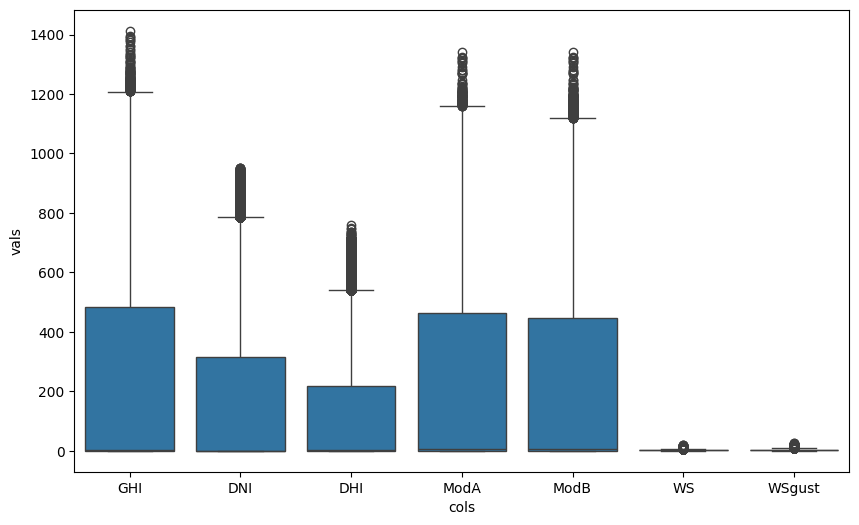

In [19]:
# columns with potential outlier values
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_melted = pd.melt(df[outlier_cols], var_name='cols', value_name='vals')
plt.figure(figsize=(10, 6))
sns.boxplot(x='cols', y='vals', data=df_melted)
plt.show()


In [20]:
# flag rows that has any value of |z-score| > 3
df_zscore = df[outlier_cols].apply(zscore)
mask = (df_zscore.abs() > 3).any(axis=1)
df_cleaned = df[~mask]
df_cleaned.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,517707.000000,517707.000000,517707.00000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000,517707.000000
mean,237.484571,167.144091,113.16676,232.241606,224.882352,28.145624,54.577296,2.065493,2.736647,0.465056,153.566695,8.525442,994.186312,0.000935,0.001124,35.078941,32.367145
std,327.168111,261.940361,151.66024,324.176090,314.242630,5.924410,28.009971,1.512982,1.907461,0.260153,102.697138,6.391467,2.468370,0.030562,0.022706,14.734974,12.333149
min,0.000000,0.000000,0.00000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,24.100000,29.000000,0.900000,1.300000,0.400000,58.200000,3.600000,993.000000,0.000000,0.000000,24.200000,23.500000
50%,0.600000,0.000000,0.40000,3.300000,3.200000,27.900000,55.100000,1.900000,2.400000,0.500000,182.300000,8.600000,994.000000,0.000000,0.000000,29.800000,28.800000
75%,468.100000,316.400000,211.70000,448.200000,433.400000,32.250000,80.200000,3.000000,3.900000,0.600000,235.300000,12.200000,996.000000,0.000000,0.000000,46.500000,41.300000
max,1232.000000,950.300000,589.30000,1205.100000,1175.000000,43.800000,100.000000,6.900000,8.700000,2.300000,360.000000,99.400000,1003.000000,1.000000,2.300000,81.000000,72.500000


 After removing the outliers data size dropped by 1.5%

In [21]:
# save the cleaned data in csv format
df_cleaned.to_csv('../data/benin-clean.csv')